In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

In [2]:
def load_cifar10():
    f = open('/home/alvin/notebook_home/ai_lab_image/corpus/cifar-10-batches-py/data_batch_1', 'rb')
    datadict = cPickle.load(f,encoding='latin1')
    f.close()
    
    DX= datadict["data"] # 1000 x (32x32x3)
    DY= datadict['labels']
    #X = DX.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    X = np.array(DX)
    Y = np.array(DY)
    return X,Y

In [22]:
def load_cifar10(dataset_number):

    for i in range(dataset_number):
        filename = '/home/alvin/notebook_home/ai_lab_image/corpus/cifar-10-batches-py/data_batch_' +str(i+1)
        f = open(filename, 'rb')
        datadict = cPickle.load(f,encoding='latin1')
        f.close()
    
        DX= datadict["data"] # 1000 x (32x32x3)
        DY= datadict['labels']
        #X = DX.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
        X[i*10000:(i+1)*10000] = np.array(DX)
        #Y[i*10000:(i+1)*10000] = np.array(DY)
        #break
    return X,Y

In [23]:
cifar_label = { '0':'airplane',
                '1':'automobile',
                '2':'bird',
                '3':'cat',
                '4':'deer',
                '5':'dog',
                '6':'frog',
                '7':'horse',
                '8':'ship',
                '9':'truck'}

In [24]:
dataset_number = 2
X = np.zeros(shape=(dataset_number*10000,32*32*3))
Y = np.zeros(shape=(dataset_number*10000,1))
X,Y = load_cifar10(dataset_number)

ValueError: could not broadcast input array from shape (10000) into shape (10000,1)

In [17]:
X.shape

(20000, 3072)

In [7]:
# display basic information 
print('dataset count = ' + str(len(X)))
for i in range(10):
    print('number of class '+ str(i) + ': ' + str(Y[np.where(Y==i)].size))

dataset count = 10000
number of class 0: 1005
number of class 1: 974
number of class 2: 1032
number of class 3: 1016
number of class 4: 999
number of class 5: 937
number of class 6: 1030
number of class 7: 1001
number of class 8: 1025
number of class 9: 981


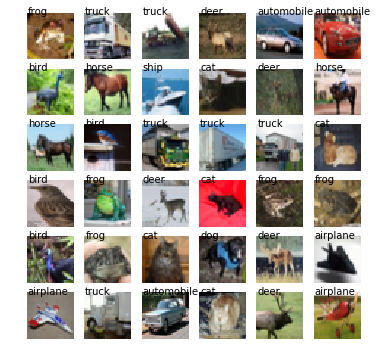

In [8]:
# display cifar image
#Visualizing CIFAR 10 method 2
X3 = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
pic_dim = 6
fig, axes1 = plt.subplots(pic_dim,pic_dim,figsize=(6,6))
for i in range(pic_dim*pic_dim):
    #print('i/pic_dim: ' + str(i/pic_dim) + 'i%pic_dim: ' + str(i%pic_dim))
    axes1[int(i/pic_dim)][int(i%pic_dim)].set_axis_off()
    axes1[int(i/pic_dim)][int(i%pic_dim)].imshow(X3[i])
    axes1[int(i/pic_dim)][int(i%pic_dim)].annotate(cifar_label[str(Y[i])],xy=(0.2,0.6))

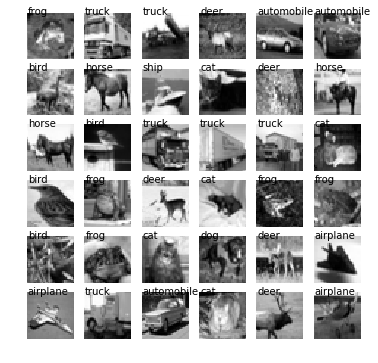

In [9]:
# display cifar image with gray
#Visualizing CIFAR 10 method 2
XG = X.reshape(10000, 3, 1024).transpose(0,2,1).astype("uint8") #1000 x 3 x 1024 --> 1000 x 1024 x 3
XG = np.mean(XG,axis=2)                                         #1000 x 1024
XG = XG.reshape(10000, 32, 32)
pic_dim = 6
fig, axes1 = plt.subplots(pic_dim,pic_dim,figsize=(6,6))
for i in range(pic_dim*pic_dim):
    #print('i/pic_dim: ' + str(i/pic_dim) + 'i%pic_dim: ' + str(i%pic_dim))
    axes1[int(i/pic_dim)][int(i%pic_dim)].set_axis_off()
    axes1[int(i/pic_dim)][int(i%pic_dim)].imshow(XG[i], cmap='gray')
    axes1[int(i/pic_dim)][int(i%pic_dim)].annotate(cifar_label[str(Y[i])],xy=(0.2,0.6))

In [ ]:
###############################################################
#   knn main code
###############################################################

In [10]:
XG = X.reshape(10000, 3, 1024).transpose(0,2,1).astype("uint8") #10000 x 3 x 1024 --> 10000 x 1024 x 3
XG = np.mean(XG,axis=2)                                         #10000 x 1024

# training set and testing test
t_rate   = 0.8
train_set_num = int(len(X)*t_rate)
train_set   = XG[:train_set_num]
train_label = Y[:train_set_num]
test_set    = XG[train_set_num+1:]
test_label  = Y[train_set_num+1:]

In [11]:
def l1_dist(input_vec, train_set):
    l1_formula = lambda x: sum(abs(input_vec - x))
    l1_dist_vec= l1_formula(train_set)
    return l1_dist_vec

def l2_dist(input_vec, train_set):
    l2_formula = lambda x: np.sqrt(sum((input_vec - x) ** 2))
    l2_dist_vec= l2_formula(train_set)
    return l2_dist_vec

In [12]:
k = 3
correct_num = 0
pred = np.zeros(shape=(len(test_set),1),dtype='uint8')
for i in range(len(test_set)):
    test_sample = test_set[i]
    dict_vec    = l1_dist(test_sample, train_set)
    idx         = np.argpartition(dict_vec,k)[0:k]
    vote        = train_label[idx[0:k]]
    #tmp = np.bincount(vote)
    #print(str(np.bincount(vote)))
    #print(str(np.argmax(tmp)))
    pred[i]     = np.argmax(np.bincount(vote))
    #if i > 100: break
    print(str(test_label[i]) + ' , ' + str(vote) + ' --> ' + str(pred[i]))
    
    if test_label[i] == train_label[idx[0]]:
        correct_num += 1

accuracy = correct_num/len(test_set)
print('knn accuarcy is ' + str(float("{0:.3f}".format(accuracy*100)))+'%')

1 , [4 0 6] --> [0]
6 , [6 6 7] --> [6]
9 , [6 5 4] --> [4]
4 , [2 0 9] --> [0]
8 , [7 1 1] --> [1]
8 , [4 9 4] --> [4]
8 , [6 5 9] --> [5]
6 , [1 6 6] --> [6]
6 , [4 0 6] --> [0]
2 , [9 6 4] --> [4]
3 , [4 2 6] --> [2]
9 , [8 5 2] --> [2]
3 , [6 3 6] --> [6]
8 , [4 6 8] --> [4]
6 , [9 4 4] --> [4]
2 , [1 4 8] --> [1]
2 , [2 3 8] --> [2]
0 , [1 7 4] --> [1]
2 , [5 2 3] --> [2]
5 , [8 4 6] --> [4]
6 , [3 6 4] --> [3]
8 , [4 2 0] --> [0]
0 , [2 1 0] --> [0]
2 , [1 6 0] --> [0]
2 , [3 4 2] --> [2]
8 , [3 2 9] --> [2]
8 , [6 2 4] --> [2]
3 , [5 3 3] --> [3]
3 , [4 3 6] --> [3]
3 , [3 2 5] --> [2]
8 , [3 4 0] --> [0]
2 , [6 8 6] --> [6]
6 , [0 2 5] --> [0]
6 , [2 9 7] --> [2]
1 , [3 1 9] --> [1]
7 , [0 4 5] --> [0]
2 , [2 7 9] --> [2]
7 , [6 9 0] --> [0]
5 , [1 9 4] --> [1]
5 , [6 3 1] --> [1]
3 , [4 6 7] --> [4]
8 , [9 7 1] --> [1]
2 , [2 1 8] --> [1]
0 , [3 0 9] --> [0]
8 , [3 4 1] --> [1]
4 , [9 4 9] --> [9]
4 , [1 3 6] --> [1]
8 , [7 3 9] --> [3]
4 , [6 5 0] --> [0]
5 , [8 1 6] --> [1]


8 , [0 5 8] --> [0]
4 , [5 6 6] --> [6]
9 , [9 6 5] --> [5]
4 , [0 2 9] --> [0]
2 , [8 4 3] --> [3]
1 , [5 6 6] --> [6]
3 , [2 6 4] --> [2]
0 , [7 3 8] --> [3]
3 , [7 4 3] --> [3]
4 , [7 6 6] --> [6]
8 , [9 8 4] --> [4]
0 , [8 5 0] --> [0]
1 , [8 2 3] --> [2]
1 , [2 0 3] --> [0]
9 , [9 9 2] --> [9]
8 , [6 8 2] --> [2]
7 , [0 3 6] --> [0]
6 , [8 4 1] --> [1]
1 , [8 0 9] --> [0]
6 , [3 7 0] --> [0]
3 , [4 8 5] --> [4]
9 , [1 2 1] --> [1]
6 , [6 7 7] --> [7]
0 , [6 8 6] --> [6]
2 , [6 2 2] --> [2]
9 , [2 6 1] --> [1]
2 , [6 7 8] --> [6]
9 , [6 7 6] --> [6]
6 , [8 6 4] --> [4]
0 , [7 3 3] --> [3]
0 , [2 8 9] --> [2]
8 , [8 4 3] --> [3]
6 , [8 3 1] --> [1]
4 , [8 8 1] --> [8]
9 , [3 8 0] --> [0]
1 , [3 2 7] --> [2]
1 , [7 2 0] --> [0]
0 , [6 4 1] --> [1]
5 , [2 5 8] --> [2]
0 , [8 6 9] --> [6]
2 , [8 6 1] --> [1]
8 , [3 6 6] --> [6]
4 , [1 7 1] --> [1]
5 , [9 7 7] --> [7]
9 , [8 3 6] --> [3]
2 , [7 1 4] --> [1]
6 , [6 4 6] --> [6]
7 , [2 8 3] --> [2]
4 , [1 1 9] --> [1]
5 , [2 4 4] --> [4]


4 , [7 8 7] --> [7]
8 , [9 1 1] --> [1]
8 , [3 8 6] --> [3]
6 , [5 6 7] --> [5]
0 , [8 1 7] --> [1]
4 , [1 6 3] --> [1]
9 , [3 1 6] --> [1]
5 , [0 2 0] --> [0]
9 , [1 7 4] --> [1]
9 , [4 3 7] --> [3]
3 , [1 4 8] --> [1]
9 , [3 5 5] --> [5]
9 , [8 4 8] --> [8]
0 , [6 5 6] --> [6]
2 , [1 7 2] --> [1]
2 , [6 7 8] --> [6]
7 , [3 2 2] --> [2]
3 , [0 3 2] --> [0]
5 , [3 6 2] --> [2]
1 , [7 3 8] --> [3]
0 , [6 0 1] --> [0]
9 , [4 9 6] --> [4]
5 , [6 2 7] --> [2]
8 , [5 0 7] --> [0]
0 , [8 8 1] --> [8]
8 , [3 7 8] --> [3]
1 , [9 6 4] --> [4]
1 , [4 2 9] --> [2]
0 , [1 8 2] --> [1]
0 , [5 9 6] --> [5]
7 , [1 5 9] --> [1]
4 , [5 4 7] --> [4]
8 , [8 4 3] --> [3]
2 , [4 7 9] --> [4]
3 , [0 1 7] --> [0]
3 , [6 7 4] --> [4]
2 , [5 6 1] --> [1]
5 , [2 6 1] --> [1]
6 , [3 1 3] --> [3]
0 , [1 6 9] --> [1]
1 , [3 5 8] --> [3]
8 , [8 8 1] --> [8]
2 , [8 3 8] --> [8]
6 , [4 6 9] --> [4]
6 , [2 7 3] --> [2]
2 , [5 4 2] --> [2]
1 , [4 5 8] --> [4]
3 , [7 4 1] --> [1]
6 , [4 2 9] --> [2]
5 , [7 1 7] --> [7]


6 , [8 1 3] --> [1]
9 , [3 6 1] --> [1]
7 , [3 8 4] --> [3]
9 , [2 2 0] --> [2]
6 , [7 7 8] --> [7]
6 , [2 6 7] --> [2]
1 , [1 9 2] --> [1]
3 , [0 6 1] --> [0]
2 , [3 7 6] --> [3]
4 , [6 5 8] --> [5]
1 , [8 2 3] --> [2]
1 , [3 2 0] --> [0]
0 , [9 5 7] --> [5]
4 , [8 4 9] --> [4]
2 , [6 6 7] --> [6]
6 , [3 7 4] --> [3]
0 , [9 1 2] --> [1]
8 , [7 6 1] --> [1]
4 , [3 4 3] --> [3]
4 , [0 3 3] --> [3]
9 , [3 6 7] --> [3]
8 , [0 6 8] --> [0]
1 , [9 9 4] --> [9]
5 , [0 8 2] --> [0]
8 , [7 4 8] --> [4]
1 , [1 2 7] --> [1]
1 , [6 2 2] --> [2]
8 , [3 1 8] --> [1]
8 , [6 4 8] --> [4]
9 , [8 8 1] --> [8]
7 , [3 1 2] --> [1]
2 , [2 0 3] --> [0]
4 , [8 1 3] --> [1]
5 , [9 2 0] --> [0]
6 , [1 1 0] --> [1]
4 , [1 2 9] --> [1]
9 , [9 4 0] --> [0]
6 , [4 6 9] --> [4]
7 , [7 3 3] --> [3]
5 , [6 7 6] --> [6]
0 , [6 3 6] --> [6]
8 , [1 4 1] --> [1]
3 , [3 4 1] --> [1]
5 , [4 1 8] --> [1]
4 , [1 4 9] --> [1]
5 , [6 2 4] --> [2]
0 , [7 6 3] --> [3]
5 , [7 8 5] --> [5]
0 , [8 7 0] --> [0]
2 , [5 7 7] --> [7]


8 , [2 6 7] --> [2]
9 , [7 6 6] --> [6]
6 , [5 6 7] --> [5]
9 , [3 4 1] --> [1]
4 , [6 0 8] --> [0]
3 , [4 7 7] --> [7]
0 , [8 8 6] --> [8]
1 , [8 2 6] --> [2]
2 , [3 4 3] --> [3]
2 , [9 8 1] --> [1]
4 , [1 0 4] --> [0]
6 , [7 3 3] --> [3]
8 , [6 8 6] --> [6]
8 , [7 1 0] --> [0]
5 , [4 6 8] --> [4]
0 , [6 7 0] --> [0]
3 , [6 6 7] --> [6]
1 , [6 7 1] --> [1]
8 , [7 3 4] --> [3]
3 , [3 3 6] --> [3]
0 , [8 1 7] --> [1]
7 , [3 7 4] --> [3]
9 , [0 5 6] --> [0]
8 , [1 6 6] --> [6]
8 , [9 1 2] --> [1]
9 , [6 3 5] --> [3]
5 , [3 6 6] --> [6]
2 , [4 6 2] --> [2]
6 , [9 3 7] --> [3]
4 , [8 7 4] --> [4]
6 , [4 6 9] --> [4]
8 , [8 8 9] --> [8]
9 , [7 2 9] --> [2]
8 , [6 7 4] --> [4]
4 , [1 9 6] --> [1]
8 , [4 7 8] --> [4]
0 , [8 6 3] --> [3]
5 , [8 9 0] --> [0]
7 , [1 8 5] --> [1]
1 , [7 1 8] --> [1]
4 , [0 6 7] --> [0]
8 , [0 3 9] --> [0]
8 , [3 2 4] --> [2]
3 , [6 2 5] --> [2]
4 , [3 5 2] --> [2]
0 , [6 7 7] --> [7]
0 , [9 2 1] --> [1]
5 , [6 7 7] --> [7]
8 , [6 9 7] --> [6]
3 , [0 3 4] --> [0]


In [84]:
k= 1
test_sample = test_set[0]
l1_dict_vec = l1_dist(test_sample,train_set)
idx = np.argpartition(l1_dict_vec,k)
#
print(Y[train_set_num+0])
print(Y[train_set_num+idx[0]])

3
3


In [34]:
int_v = test_set[0]/255
trn_v = train_set[0]/255
print(int_v)
print(trn_v)

[ 0.00258362  0.002599    0.00264514 ...,  0.00149173  0.00155325
  0.00156863]
[ 0.00090734  0.00066128  0.00076894 ...,  0.00215302  0.00129181
  0.00110727]


In [20]:
print('np.linalg.norm = ' + str(np.linalg.norm((int_v - trn_v), ord=2)))
dist_l1 = sum(abs(int_v - trn_v))
print('sum(abs(a-b)) = ' + str(dist_l1))


np.linalg.norm = 0.00378234754009
sum(abs(a-b)) = 0.0083660130719


In [31]:
int_v = np.array([1,1,1,1,1])
tring_set = np.array([[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5]])
#dist_lambda = lambda x: np.linalg.norm((int_v - x), ord=1)
dist_lambda = lambda x: sum(abs(int_v - x))
#dist_vec = map{lamda x: np.linalg.norm((int_v - x), ord=1),train_set}
dist_vec = dist_lambda(tring_set)
dist_vec

array([10, 10, 10, 10, 10])